# Around Simpson's Paradox

In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data are available in the MOOC repository. The CSV file contains data for the 1314 women that were polled in Whickham, England, in 1972-1974 and were categorized as "currently smoking" or "never smoked". Each line is related to a person and contains whether she smokes or not, whether alive or dead twenty year after the survey and her age at the time of the survey.

In [50]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"
data = pd.read_csv(data_url)
print("Number of rows:", len(data))
data.head()

Number of rows: 1314


Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

The CSV file does not contain any missing data.

In [51]:
print("Number of rows with missing values:", data.isnull().any(axis=1).sum())

Number of rows with missing values: 0


---

Let's visualize the number of women alive and dead after twenty years, according to their smoking habits. A heatmap is effective in this case.

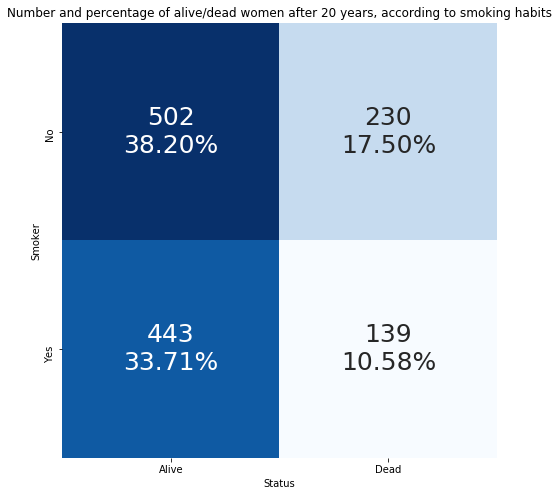

In [52]:
count = np.array(data.groupby(['Smoker', 'Status']).count())
count = np.reshape(count, (2, 2))
annots = np.array([f"{v}\n{v/len(data):.2%}" for v in count.flatten()]).reshape(2,2)

plt.figure(figsize=(10,8))
sns.heatmap(count, annot=annots, fmt="", cmap='Blues', cbar=False, square=True,
           xticklabels=['Alive', 'Dead'], yticklabels=['No', 'Yes'], annot_kws={"fontsize": 25})
plt.title("Number and percentage of alive/dead women after 20 years, according to smoking habits")
plt.xlabel("Status")
plt.ylabel("Smoker")
plt.show()

It is possible to see that the fraction of smokers and non smokers is quite balanced (in total, 582 smokers and 732 non smokers). As expected, there are less dead than alive people (369 versus 945).

We can then compute the mortality rate for the two groups. For a population proportion $p$, confidence intervals are computed as $\hat{p} \pm z \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$, where $\hat{p}$ is the sample proportion, $n$ is the sample size and $z$ is the value derived from the standard normal distribution. For 95% confidence intervals, $z=1.96$.

In [53]:
z = 1.96

num_smokers = sum(data['Smoker'] == "Yes")
num_dead_smokers = sum(np.logical_and(data['Smoker'] == "Yes", data['Status'] == "Dead"))
rate_smokers = num_dead_smokers / num_smokers
ci_smokers = z * (rate_smokers * (1 - rate_smokers) / num_smokers) ** 0.5
print(f"Mortality rate for smokers:\t{rate_smokers:.2%} " + u"\u00B1" + f" {ci_smokers:.2%}")

num_non_smokers = len(data) - num_smokers
num_dead_non_smokers = sum(np.logical_and(data['Smoker'] == "No", data['Status'] == "Dead"))
rate_non_smokers = num_dead_non_smokers / num_non_smokers
ci_non_smokers = z * (rate_non_smokers * (1 - rate_non_smokers) / num_non_smokers) ** 0.5
print(f"Mortality rate for non smokers:\t{rate_non_smokers:.2%} " + u"\u00B1" + f" {ci_non_smokers:.2%}")

Mortality rate for smokers:	23.88% ± 3.46%
Mortality rate for non smokers:	31.42% ± 3.36%


Surprisingly, the mortality rate is sensibly higher for women categorized as non smokers. However, we are not taking into account an important information: the age of those people at the time of the poll. This result can be expected, for example, if the average age of polled non smokers was higher than the one of smokers.

---

Let's now include the age in the analysis. The following age classes are considered: 18-34 years, 35-54 years, 55-64 years, over 65 years.

In [54]:
def bin_age(age):
    if age < 18:
        return None
    if age < 35:
        return "18-34 years"
    elif age < 55:
        return "35-54 years"
    elif age < 65:
        return "55-64 years"
    else:
        return "Over 65 years"

data['Binned age'] = data['Age'].apply(bin_age)
data.head()

Smoker Status   Age     Binned age
0    Yes  Alive  21.0    18-34 years
1    Yes  Alive  19.3    18-34 years
2     No   Dead  57.5    55-64 years
3     No  Alive  47.1    35-54 years
4    Yes  Alive  81.4  Over 65 years

Again, let's check that no missing are present, to ensure that no women under 18 was polled.

In [55]:
print("Number of rows with missing values:", data.isnull().any(axis=1).sum())

Number of rows with missing values: 0


In [56]:
np.array(data.groupby(['Binned age', 'Smoker', 'Status']).count())

array([[221],
       [  6],
       [182],
       [  7],
       [172],
       [ 19],
       [190],
       [ 39],
       [ 81],
       [ 40],
       [ 64],
       [ 51],
       [ 28],
       [165],
       [  7],
       [ 42]])

In [57]:
data.groupby(['Binned age', 'Smoker', 'Status']).count()

Age
Binned age    Smoker Status     
18-34 years   No     Alive   221
                     Dead      6
              Yes    Alive   182
                     Dead      7
35-54 years   No     Alive   172
                     Dead     19
              Yes    Alive   190
                     Dead     39
55-64 years   No     Alive    81
                     Dead     40
              Yes    Alive    64
                     Dead     51
Over 65 years No     Alive    28
                     Dead    165
              Yes    Alive     7
                     Dead     42

Barchart with one bar for each age, divided in four parts(smoker or not, dead or alive)